In [1]:
import pandas as pd

In [2]:
infile='data/movies_cleaned.csv'

In [3]:
df = pd.read_csv(infile)

In [4]:
df.head()

,Unnamed: 0,profit,budget,company,country,director,genre,gross,name,rating,released,runtime,star,writer,year,ROI_pct,release_dt
0,0,44287414,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,Wil Wheaton,Stephen King,1986,553.592675,1986-08-22
1,1,64136369,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,Matthew Broderick,John Hughes,1986,1068.939483,1986-06-11
2,2,164800601,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,Tom Cruise,Jim Cash,1986,1098.670673,1986-05-16
3,3,66660248,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,Sigourney Weaver,James Cameron,1986,360.325665,1986-07-18
4,4,9564613,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,Joey Cramer,Mark H. Baker,1986,106.273478,1986-08-01


In [5]:
columns_to_drop = ['Unnamed: 0']
df=df.drop(columns_to_drop, axis='columns')

In [6]:
df.head()

,profit,budget,company,country,director,genre,gross,name,rating,released,runtime,star,writer,year,ROI_pct,release_dt
0,44287414,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,Wil Wheaton,Stephen King,1986,553.592675,1986-08-22
1,64136369,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,Matthew Broderick,John Hughes,1986,1068.939483,1986-06-11
2,164800601,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,Tom Cruise,Jim Cash,1986,1098.670673,1986-05-16
3,66660248,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,Sigourney Weaver,James Cameron,1986,360.325665,1986-07-18
4,9564613,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,Joey Cramer,Mark H. Baker,1986,106.273478,1986-08-01


array([[<AxesSubplot:title={'center':'profit'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'ROI_pct'}>]], dtype=object)

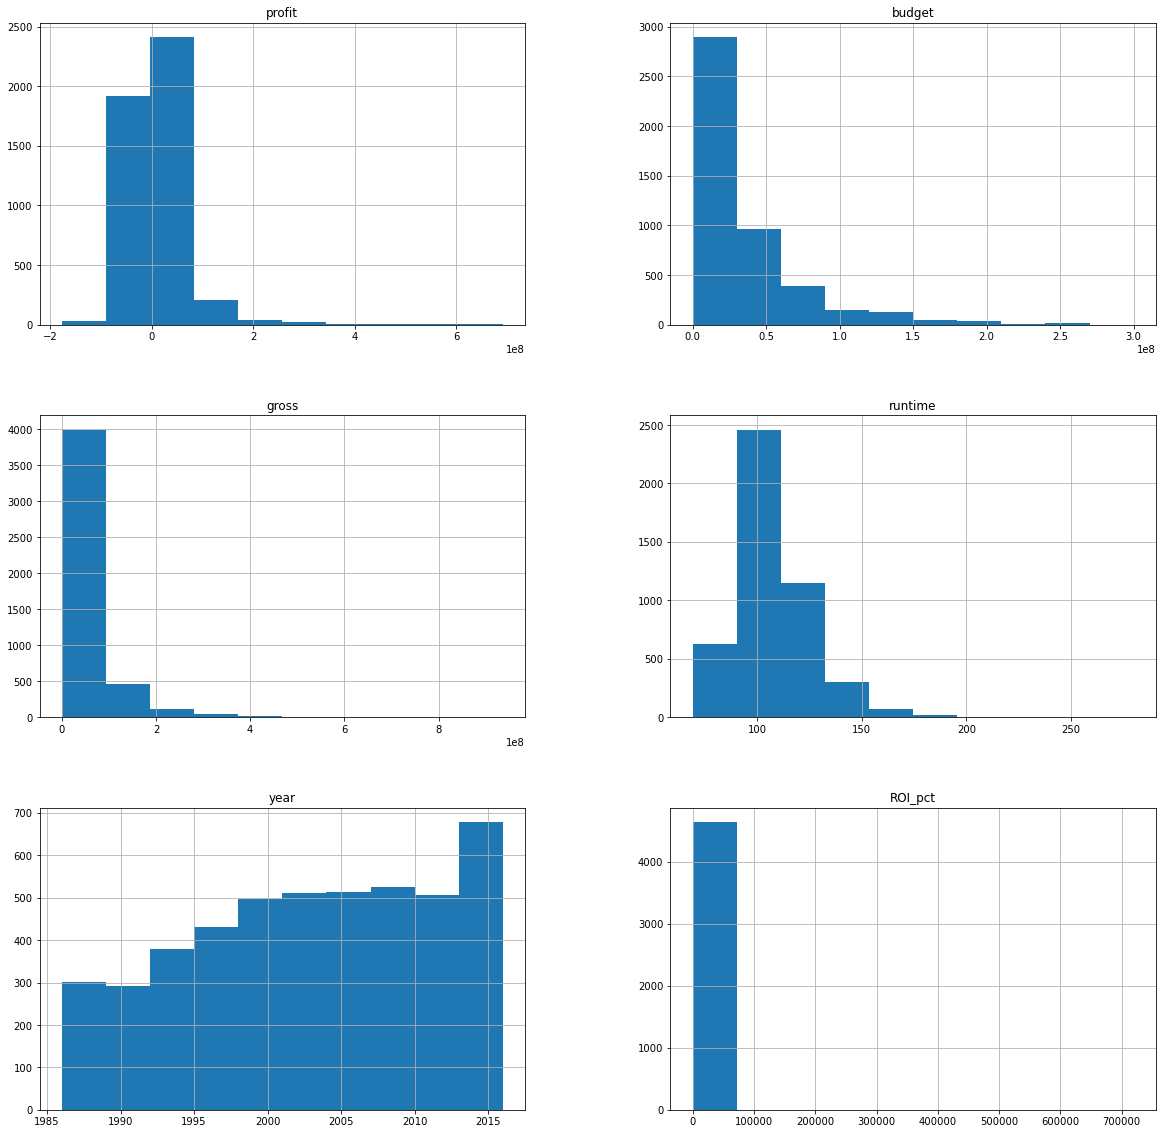

In [19]:
df.hist(figsize=(20,20))

In [8]:
round(df.describe(),2)

,profit,budget,gross,runtime,year,ROI_pct
count,4.638000e+03,4.638000e+03,4.638000e+03,4638.00,4638.00,4638.00
mean,9.929093e+06,3.614560e+07,4.607469e+07,107.60,2002.49,317.58
std,4.887354e+07,3.996947e+07,6.629378e+07,18.02,8.46,11147.55
min,-1.769219e+08,6.000000e+03,3.090000e+02,69.00,1986.00,-100.00
25%,-1.134624e+07,1.000000e+07,6.290905e+06,96.00,1996.00,-58.88
50%,-3.212785e+05,2.300000e+07,2.345551e+07,104.00,2003.00,-3.12
75%,1.977768e+07,4.600000e+07,5.778243e+07,117.00,2010.00,96.50
max,6.916622e+08,3.000000e+08,9.366622e+08,280.00,2016.00,719358.73


In [23]:
IQR_ROI = 96.50-(-58.88)

In [10]:
def outliers(df, column_name):
    quartiles = df[column_name].quantile([.25,.5,.75]) 
    lowerq = quartiles[0.25]                           
    upperq = quartiles[0.75]                           

    iqr = upperq-lowerq                                
    lower_bound = lowerq - (1.5*iqr)                   
    upper_bound = upperq + (1.5*iqr)                   

    #count the number of outliers in data set
    high_outliers_count = 0
    low_outliers_count = 0
    for value in df[column_name]:
        if (value > upper_bound):
            high_outliers_count += 1
        elif (value < lower_bound):
            low_outliers_count += 1


    numerator   = high_outliers_count+low_outliers_count
    denominator = len(df[column_name])
    ratio = numerator/denominator

    out_string = f'There are {numerator:,} out of {denominator:,} outliers, or {ratio:.0%}. {low_outliers_count} are below {lower_bound}, and {high_outliers_count} are above {upper_bound}'
    return out_string

In [11]:
outliers(df, 'ROI_pct')

'There are 385 out of 4,638 outliers, or 8%. 0 are below -291.9600773602485 385 are above 329.5764436004141'